## EDA/prepartation of historical Groundwater Storage (response variable)

Historical groundwater storage (GWS) in 21 Bulletin 118 subbasins is simulated by CA-DWR's fininte-element [C2VSim fine grid beta version model](https://data.cnra.ca.gov/dataset/c2vsimfg-beta-model) (element resolution ~ 1km). The model produces a detailed water budget from the 1974 to the 2015 water year (1973-10-31 : 2015-09-30). It is possible to run the original [C2VSim coarse grid model](http://c2vsim.water.ca.gov/C2VSim/iwfm.html) to obtain GWS prior to 1974, but it may not be necessary given the limited timespan of remotely sensed predictors (i.e. - ET, NDVI, etc).  

We start by extracting the groundwater budget at 3 spatial scales:  

1. Entire Central Valley  
2. Hydrologic Region  
3. Subbasin  

In [1]:
# packages used
library(dplyr)
library(ggplot2)
library(lubridate)
library(readxl)
library(sf)
library(viridis)
library(cowplot)
library(readr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Linking to GEOS 3.6.1, GDAL 2.2.3, proj.4 4.9.3
Loading required package: viridisLite

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave



In [2]:
# read water budget for entire cv
d <- read_xlsx("C:/Users/rpauloo/Desktop/pred_gws/data/C2VSimFG-BETA_PublicRelease/Excel/C2VSimFG_GWBudget.xlsx", 
               sheet = 22,
               skip = 4) 

In [3]:
head(d); tail(d)

Time,Percolation,Beginning Storage (+),Ending Storage (-),Deep Percolation (+),Gain from Stream (+),Recharge (+),Gain from Lake (+),Boundary Inflow (+),Subsidence (+),Subsurface Irrigation (+),Tile Drain Outflow (-),Pumping (-),Outflow to Root Zone (-),Net Subsurface Inflow (+),Discrepancy (=),Cumulative Subsidence
1973-10-31,817622.6,4575168754,4575555111,543864.7,-152956.8,86155.80,0,229874.4,0,0,898.3854,319682.3,0,0,0.5612772,0
1973-11-30,827360.9,4575555111,4578075790,2114095.9,391909.9,35303.47,0,227418.0,0,0,604.2082,247465.7,0,0,-21.6694526,0
1973-12-31,1102666.2,4578075790,4581297108,2857326.3,244139.3,26615.45,0,226741.3,0,0,377.1166,133119.8,0,0,7.3374948,0
1974-01-31,1235043.9,4581297108,4585170011,3150737.9,496860.6,108291.29,0,230756.7,0,0,241.9262,113533.9,0,0,-32.0441228,0
1974-02-28,701306.1,4585170011,4588180232,3126878.7,-107853.2,86778.34,0,233714.9,0,0,168.2680,329110.9,0,0,18.3079067,0
1974-03-31,867709.8,4588180232,4591566945,2827869.0,440654.7,136912.71,0,242601.6,0,0,115.1816,261173.3,0,0,36.3709615,0


Time,Percolation,Beginning Storage (+),Ending Storage (-),Deep Percolation (+),Gain from Stream (+),Recharge (+),Gain from Lake (+),Boundary Inflow (+),Subsidence (+),Subsurface Irrigation (+),Tile Drain Outflow (-),Pumping (-),Outflow to Root Zone (-),Net Subsurface Inflow (+),Discrepancy (=),Cumulative Subsidence
2015-04-30,528801.8,4528540887,4527736302,499032.5,1639.647,115352.3,0,33295.63,0,0,0,1453898,0,0,7.3986045,0
2015-05-31,668326.7,4527736302,4525559897,472918.3,51147.728,194119.2,0,32299.26,0,0,0,2926900,0,0,-10.4400406,0
2015-06-30,651696.7,4525559897,4523249409,380308.9,70151.292,249671.0,0,31916.69,0,0,0,3042541,0,0,-4.7979497,0
2015-07-31,640653.9,4523249409,4520552711,380941.5,148380.117,260639.3,0,31582.25,0,0,0,3518237,0,0,4.3692477,0
2015-08-31,628093.0,4520552711,4517836494,367450.0,151413.016,194490.1,0,31317.15,0,0,0,3460886,0,0,0.4164456,0
2015-09-30,589558.8,4517836494,4515498027,329482.4,95203.069,120562.1,0,30983.30,0,0,0,2914700,0,0,-1.9982409,0


In [4]:
# grab the relevant data and convert af to maf
d <- rename(d, dt = "Time", s = "Ending Storage (-)") %>% 
       select(dt, s) %>%
       mutate(s = s/1000000)

d <- mutate(d, region = "Entire CV", sb_id = 22)

Reading layer `C2VSimFG_Subregions' from data source `C:\Users\rpauloo\Desktop\pred_gws\data\C2VSimFG-BETA_GIS\Shapefiles\C2VSimFG_Subregions.shp' using driver `ESRI Shapefile'
Simple feature collection with 21 features and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: 531739.5 ymin: 3870649 xmax: 901814.4 ymax: 4503238
epsg (SRID):    26910
proj4string:    +proj=utm +zone=10 +datum=NAD83 +units=m +no_defs


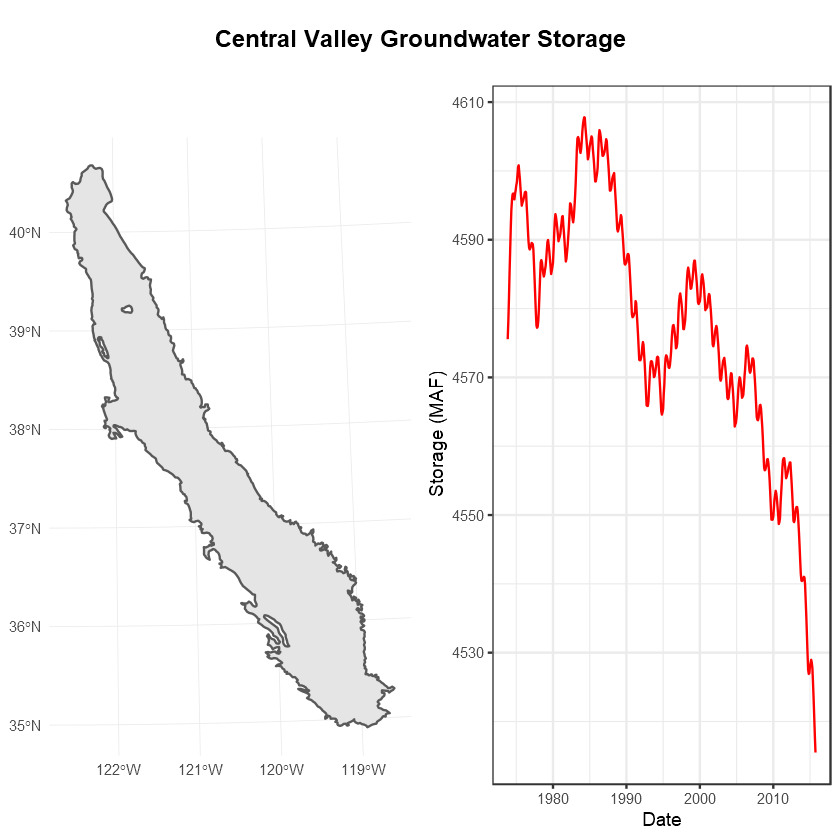

In [5]:
# plot
s <- st_read("C:/Users/rpauloo/Desktop/pred_gws/data/C2VSimFG-BETA_GIS/Shapefiles/C2VSimFG_Subregions.shp")
su <- st_union(s)

p1 <- ggplot(d, aes(dt, s)) + 
  geom_line(color = "red") + 
  theme_bw() +
  labs(x = "Date", y = "Storage (MAF)")

p2 <- ggplot(su) + 
    geom_sf() + 
    theme_minimal()

title <- ggdraw() + draw_label("Central Valley Groundwater Storage", fontface='bold')
p3 <- plot_grid(p2, p1)
plot_grid(title, p3, ncol = 1, rel_heights = c(0.1, 1)) # rel_heights values control title margins

In [6]:
# now grab hydrologic region storages 
key <- data.frame(region = c(rep("Sac Valley", 7), 
                             "East Side Streams", 
                             "Sac-SJ Delta",
                             rep("SJ Basin", 4), 
                             rep("Tulare Basin", 8)),
                  id     = 1:21)

# read all data into a list
l <- vector("list", length = 21)
for(i in 1:21){
    l[[i]] <- read_xlsx("C:/Users/rpauloo/Desktop/pred_gws/data/C2VSimFG-BETA_PublicRelease/Excel/C2VSimFG_GWBudget.xlsx", 
               sheet = i,
               skip = 4)
}

In [7]:
# subset for important data and add region name/id
for(i in 1:length(l)){
    l[[i]] <- rename(l[[i]], dt = "Time", s = "Ending Storage (-)") %>% 
       select(dt, s) %>%
       mutate(s      = s/1000000,
              region = key[i, "region"],
              sb_id  = key[i, "id"])
}

# combine into one dataframe
ldf <- bind_rows(l)

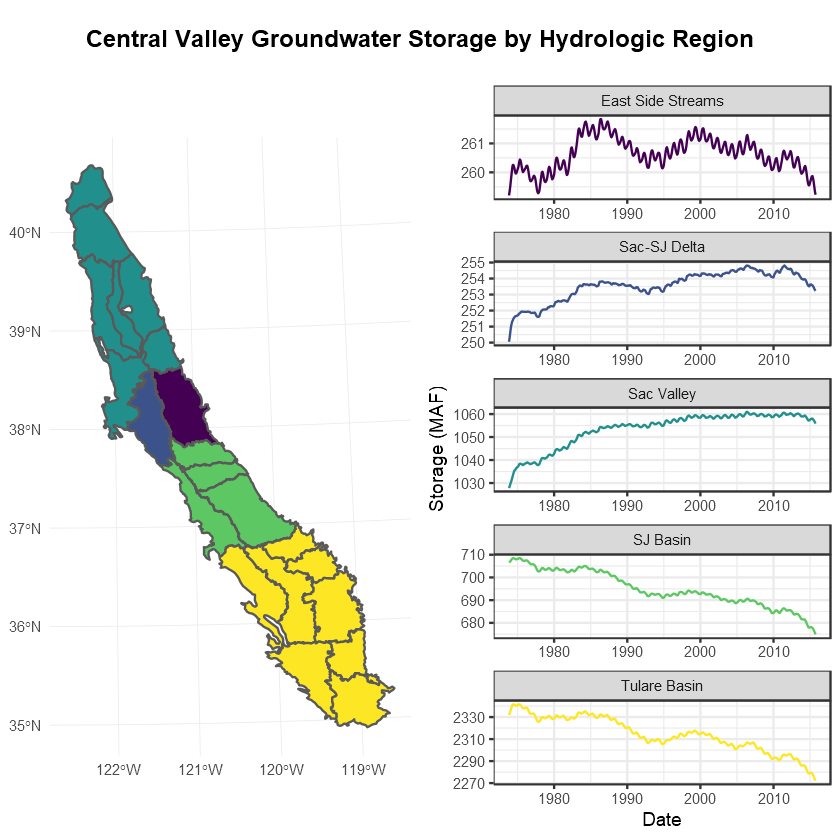

In [8]:
# calculate regional storages and visualize
ldf <- ldf %>% 
  group_by(region, dt) %>% 
  summarise(s = sum(s))

p4 <- ldf %>%
  ggplot(aes(dt, s)) +
  geom_line(aes(color = region)) +
  theme_bw() +
  facet_wrap(~region, scales = "free", ncol= 1) +
  labs(x = "Date", y = "Storage (MAF)") +
  guides(color = FALSE) + 
  scale_color_viridis_d()

# bring in shapefiles, map subbasins to regions, and visualize 
s <- mutate(s, region = case_when(SubRegion %in% 1:7   ~ "Sac Valley",
                                  SubRegion == 8       ~ "East Side Streams",
                                  SubRegion == 9       ~ "Sac-SJ Delta",
                                  SubRegion %in% 10:13 ~ "SJ Basin",
                                  SubRegion %in% 14:21 ~ "Tulare Basin"))

p5 <- ggplot(s) + 
    geom_sf(aes(fill = region)) + 
    scale_fill_viridis_d("Region") + 
    theme_minimal() +
    guides(fill = FALSE)

title <- ggdraw() + draw_label("Central Valley Groundwater Storage by Hydrologic Region", fontface='bold')
p6 <- plot_grid(p5, p4)
plot_grid(title, p6, ncol = 1, rel_heights = c(0.1, 1)) # rel_heights values control title margins

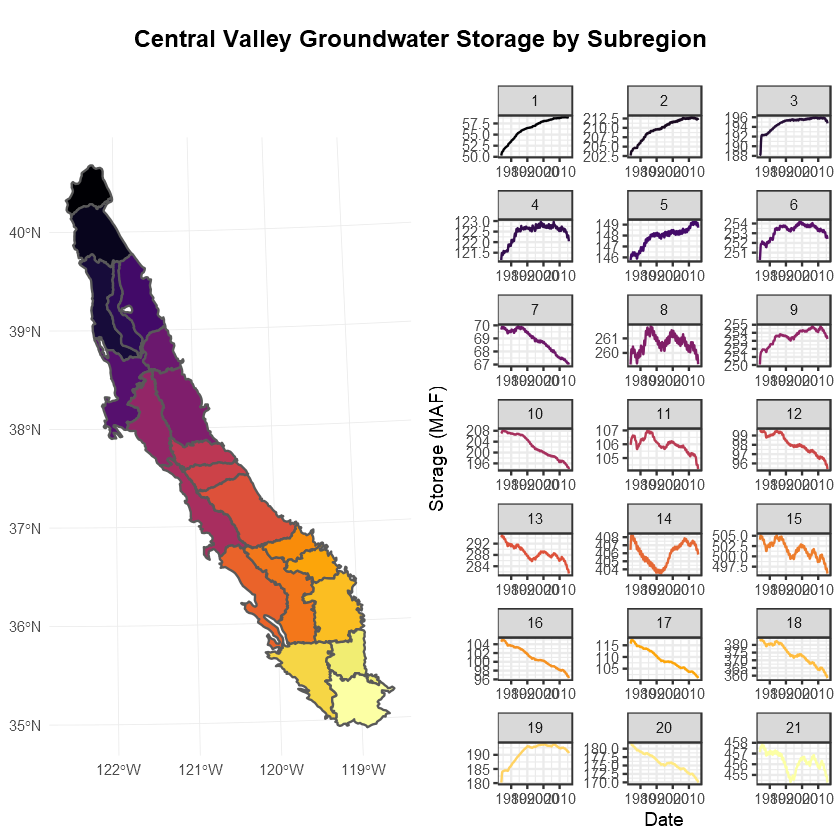

In [9]:
# lastly we grab and visualize the subregional level storages
ldf2 <- bind_rows(l)

p7 <- ldf2 %>% 
  ggplot(aes(dt, s)) +
  geom_line(aes(color = sb_id)) +
  theme_bw() +
  facet_wrap(~sb_id, scales = "free", nrow = 7) +
  labs(x = "Date", y = "Storage (MAF)") +
  guides(color = FALSE) + 
  scale_color_viridis_c(option = "B")

p8 <- ggplot(s) + 
    geom_sf(aes(fill = factor(SubRegion))) + 
    scale_fill_viridis_d("SubRegion", option = "B") + 
    theme_minimal() +
    guides(fill = FALSE)

title <- ggdraw() + draw_label("Central Valley Groundwater Storage by Subregion", fontface='bold')
p9 <- plot_grid(p8, p7)
plot_grid(title, p9, ncol = 1, rel_heights = c(0.1, 1)) # rel_heights values control title margins

***  

## Export for ML

Labeled data at the CV, Hydrologic Region, and Subregional levels are saved for further analysis.  

In [10]:
# reorganize data so it's in  a standard format
d <- select(d, -sb_id)
ldf <- select(ldf, dt, s, region)
ldf2 <- select(ldf2, -region) %>% rename(region = sb_id)

# write to tab-separated ASCII files
write_tsv(d, "C:/Users/rpauloo/Desktop/pred_gws/ml/response/storage_cv.tsv")
write_tsv(ldf, "C:/Users/rpauloo/Desktop/pred_gws/ml/response/storage_hydro_regions.tsv")
write_tsv(ldf2, "C:/Users/rpauloo/Desktop/pred_gws/ml/response/storage_subbains.tsv")